In [1]:
import cifar10
import matplotlib.pyplot as plt

import csv
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape, cls_train.shape, labels_train.shape

((50000, 32, 32, 3), (50000,), (50000, 10))

The image shape (50000, 32, 32, 3) means that there is a collection of 50,000 images, each of size 32 by 32 pixels, with 3 color channels (red, green, and blue). The images are likely in a format commonly used in machine learning, such as a numpy array or a tensor.

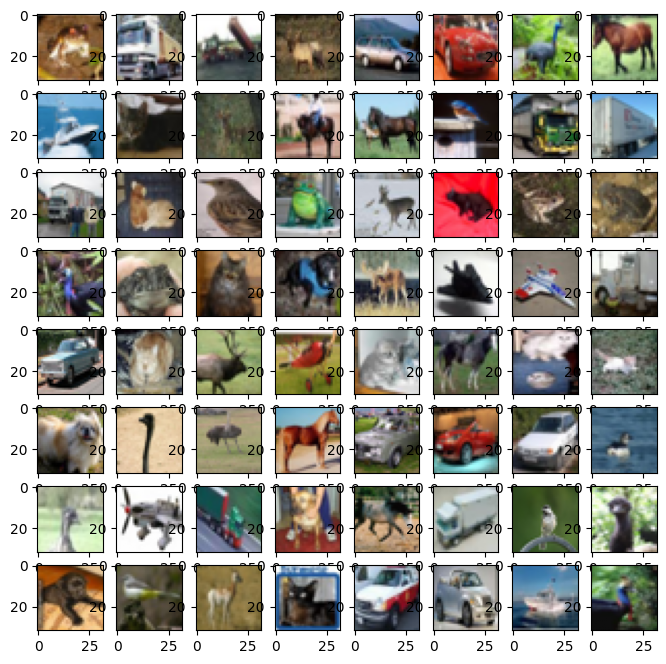

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

In [8]:
x_train = labels_train
y_train = cls_train
x_test = labels_test
y_test = cls_test
x_train.shape, y_train.shape

((50000, 10), (50000,))

In [9]:
pca = PCA()
pca.fit(x_train)

PCA()

In [10]:
pca.components_.shape

(10, 10)

In [11]:
# k = 0
# total = sum(pca.explained_variance_)
# currentSum = 0
# while currentSum/total < 0.99:
#     currentSum += pca.explained_variance_[k]
#     k = k+1
# k

In [12]:
# pca = PCA(n_components = k, whiten = True)
# transformed_data = pca.fit_transform(x_train)
# transformed_data.shape

In [13]:
# x_approx = pca.inverse_transform(transformed_data)
# x_approx.shape

In [14]:
# x_approx_images = x_approx.reshape((50000, 32, 32))

In [15]:
# fig = plt.figure(figsize=(8,8))
# for i in range(64):
#     ax = fig.add_subplot(8, 8, i+1)
#     ax.imshow(x_approx[i], cmap = plt.cm.bone)
# plt.show()

In [16]:
from sklearn import ensemble
import time
from sklearn.metrics import classification_report


rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
print('Time Taken:- ',end-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

Time Taken:-  2.6191177368164062
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [26]:
out = []
for i in y_pred:
    out.append(class_names[i])
print(out)

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'dog', 'bird', 'deer', 'airplane', 'truck', 'frog', 'frog', 'dog', 'deer', 'dog', 'truck', 'bird', 'deer', 'automobile', 'truck', 'dog', 'deer', 'frog', 'dog', 'frog', 'airplane', 'truck', 'cat', 'truck', 'horse', 'frog', 'truck', 'ship', 'airplane', 'cat', 'ship', 'ship', 'horse', 'horse', 'deer', 'frog', 'horse', 'cat', 'frog', 'cat', 'frog', 'bird', 'automobile', 'bird', 'cat', 'horse', 'bird', 'frog', 'ship', 'ship', 'airplane', 'bird', 'truck', 'cat', 'cat', 'ship', 'ship', 'automobile', 'automobile', 'horse', 'bird', 'dog', 'bird', 'horse', 'ship', 'truck', 'airplane', 'cat', 'ship', 'frog', 'deer', 'frog', 'frog', 'airplane', 'airplane', 'horse', 'deer', 'dog', 'frog', 'cat', 'automobile', 'automobile', 'cat', 'frog', 'ship', 'horse', 'deer', 'airplane', 'frog', '

In [28]:
np.savetxt('cifar10_Predictions',out, fmt='%s', delimiter=',')